#Importing required libraries

In [1]:
#Required libraries
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.utils import check_random_state
from sklearn.preprocessing import LabelEncoder
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.datasets import load_iris
from mlxtend.plotting.decision_regions import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from sklearn import svm

#Dataset used for SVM analysis

In [2]:
Feature, Target = make_circles(n_samples=1000, factor=0.3, noise=0.05, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(Feature, Target, test_size=0.1, stratify=Target, random_state=0)

#Linear and Non-linear Support Vector Machine

In [3]:
class SupportVectorMachine: #class SVM
    #initiating constructors 
    def __init__(self,Kernel=None,LambdaParameter=1e-2,Lear_Rate=1e-3, Total_Iter=1000):
        self.Lear_Rate = Lear_Rate #learning rates 
        self.Kernel=Kernel # kernal values 
        self.LambdaParameter = LambdaParameter #lambda parameters
        self.Total_Iter = Total_Iter #total epochs and number of training iterations 
        self.w = None #weights 
        self.b = None #bias 

    def BiasWeight(self, X): 
        TotalFeatures = X.shape[1]  #feature values 
        self.w = np.zeros(TotalFeatures) # taking weights 
        self.b = 0 #making bias zero 

    def Mapping_Class(self, y):   #mapping classes values 
        return np.where(y <= 0, -1, 1) 
    
    def LinearKernel(self, x): #kernel linear
        return np.dot(x, self.w) + self.b
    
    def PolynomialKernel(self, x):  #kernel polynomial 
        return (1 + np.dot(x, self.w)+ self.b) ** 3 

    def _Constraint(self, x, _Index): #constaints function 
      if self.Kernel=='linear': # for linear kernel
        LinearModelKernel = self.LinearKernel(x) 
        return self.ClassMapping[_Index] * LinearModelKernel >= 1
      elif self.Kernel=='poly': # for polynomial kernel
        PolynomialWeight = self.PolynomialKernel(x) 
        return self.ClassMapping[_Index] *PolynomialWeight>=1
    
    def _Gradients(self, Negative, x, _Index): #gradients 
        if Negative: # if there is cons then it will take this values
            FeatureWeights = self.LambdaParameter * self.w
            BiasValue = 0
            return FeatureWeights, BiasValue #returning feature and bias values 
        
        FeatureWeights = self.LambdaParameter * self.w - np.dot(self.ClassMapping[_Index], x)
        BiasValue = - self.ClassMapping[_Index] #class mapping function calling 
        return FeatureWeights, BiasValue
    
    def UpdatingBias(self, FeatureWeights, BiasValue): #updating bias values 
        self.w -= self.Lear_Rate * FeatureWeights #weights value = learning * feature weights 
        self.b -= self.Lear_Rate * BiasValue
    
    def fit(self, X, y): #model fit function 
        self.BiasWeight(X)
        self.ClassMapping = self.Mapping_Class(y)
        for _ in range(self.Total_Iter):
            for _Index, x in enumerate(X): # iterating in feature values 
                Negative = self._Constraint(x, _Index) #taking all constaints
                FeatureWeights, BiasValue = self._Gradients(Negative, x, _Index) # feature and bias 
                self.UpdatingBias(FeatureWeights, BiasValue) #updating bias values 
    
    def predict(self, X): #predict function for analysing the model 
        WeightValue = np.dot(X, self.w) + self.b
        modelpred = np.sign(WeightValue)
        return np.where(modelpred == -1, 0, 1)

In [4]:
#Model accuracy fucntion for checking predicted score by model on test data 
def ModelAccuracy(y_true, y_pred):
    result = np.sum(y_true==y_pred) / len(y_true)
    return result

#Training model and Performance Analysis

#For Linear classifier 

In [5]:
#trainig and checking model accuracy for linear model on 1000 iterations 
LinearClassfier = SupportVectorMachine(Total_Iter=1000, Kernel='linear')
LinearClassfier.fit(X_train, y_train) #model fit 
predictions = LinearClassfier.predict(X_test) #Prediction 
print("Non Linear Support Vector Machine Accuracy: ", ModelAccuracy(y_test, predictions))

Non Linear Support Vector Machine Accuracy:  0.61


#Plotting decision regions

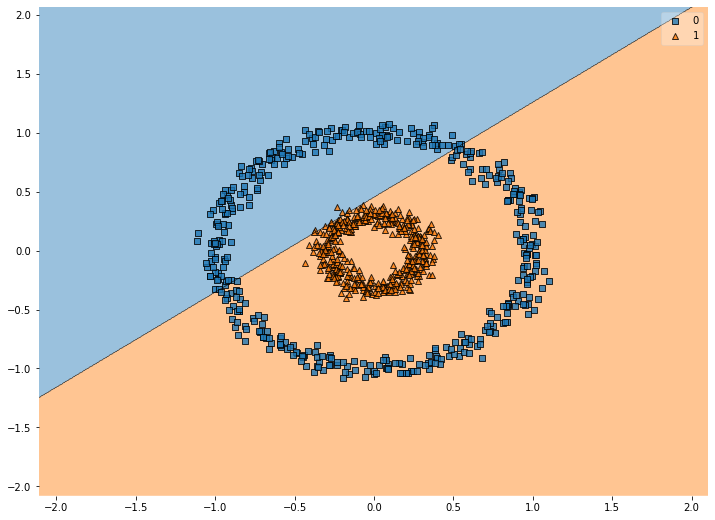

In [6]:
plt.figure(figsize=(12, 9))
plot_decision_regions(X_train, y_train, LinearClassfier)#plot decision regions

#Polynomial Model

In [7]:
#trainig and checking model accuracy for polynomial model on 1000 iterations
PolyNomialClassfier = SupportVectorMachine(Total_Iter=1000, Kernel='poly')
PolyNomialClassfier.fit(X_train, y_train) #model fit for poly 
predictions = PolyNomialClassfier.predict(X_test) #prediction on testing data 
print("SVM Accuracy: ", ModelAccuracy(y_test, predictions))#total accuracy 

SVM Accuracy:  0.24


#Plotting decision regions

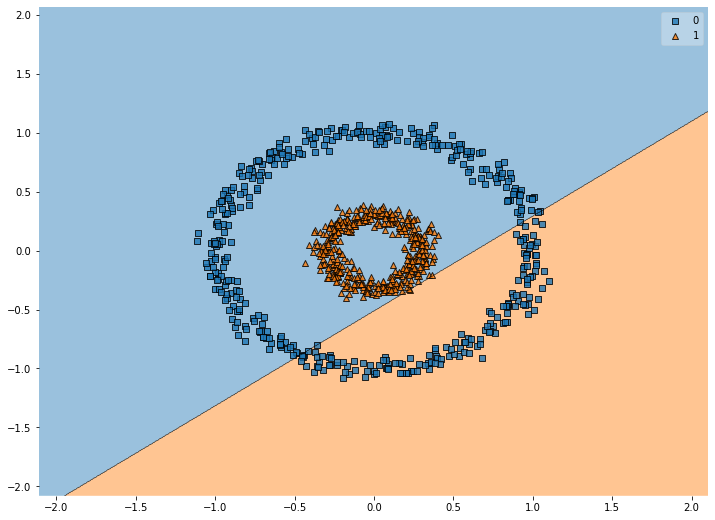

In [8]:
plt.figure(figsize=(12, 9))
plot_decision_regions(X_train, y_train, PolyNomialClassfier) #plot decision regions

#Comparing the above implementation with sklearn model SVC

In [9]:
#Linear Model 
ScikitLinearModel = svm.SVC(kernel='linear').fit(X_train, y_train)
#Polynomial Model
ScikitPolyModel = svm.SVC(kernel='poly').fit(X_train, y_train)

#Prediction

In [10]:
LinearPred = ScikitLinearModel.predict(X_test)  #prediction on testing data 
PolyPred = ScikitPolyModel.predict(X_test) #prediction on testing data 

#FOR LINEAR MODEL

In [11]:
LinearAccuracy = accuracy_score(y_test, LinearPred) #prediction on testing data for linear
LinearF1Score = f1_score(y_test, PolyPred, average='weighted') #prediction on testing data using F1_score
print('Accuracy (linear Kernel): ', "%.2f" % (LinearAccuracy*100))
print('F1_SCORE (linear Kernel): ', "%.2f" % (LinearF1Score*100))

Accuracy (linear Kernel):  62.00
F1_SCORE (linear Kernel):  57.13


#plot_decision_regions For Linear

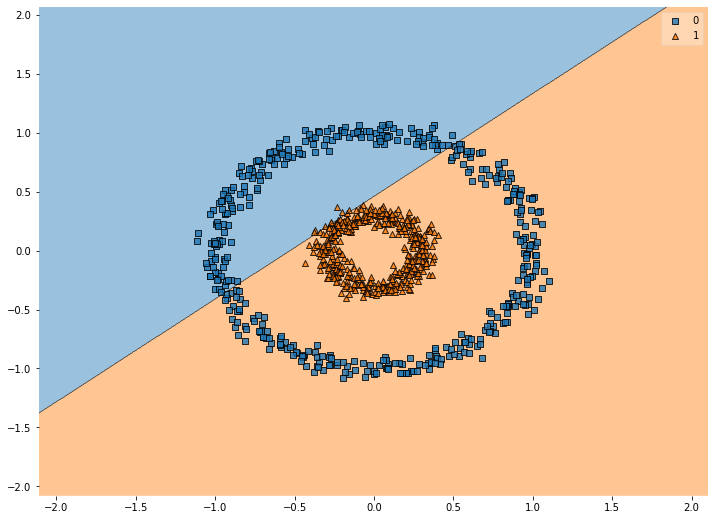

In [12]:
plt.figure(figsize=(12, 9))
plot_decision_regions(X_train, y_train, ScikitLinearModel) #plot decision regions

#Polynomial using scikit Learn

In [13]:
PolyAccuracy = accuracy_score(y_test, PolyPred) #prediction on testing data for polynomial
PolyF1Score = f1_score(y_test, PolyPred, average='weighted') #prediction on testing data using F1_score
print('Accuracy (Polynomial Kernel): ', "%.2f" % (PolyAccuracy*100))
print('F1_Score (Polynomial Kernel): ', "%.2f" % (PolyF1Score*100))

Accuracy (Polynomial Kernel):  63.00
F1_Score (Polynomial Kernel):  57.13


# plot_decision_regions For Polynomial

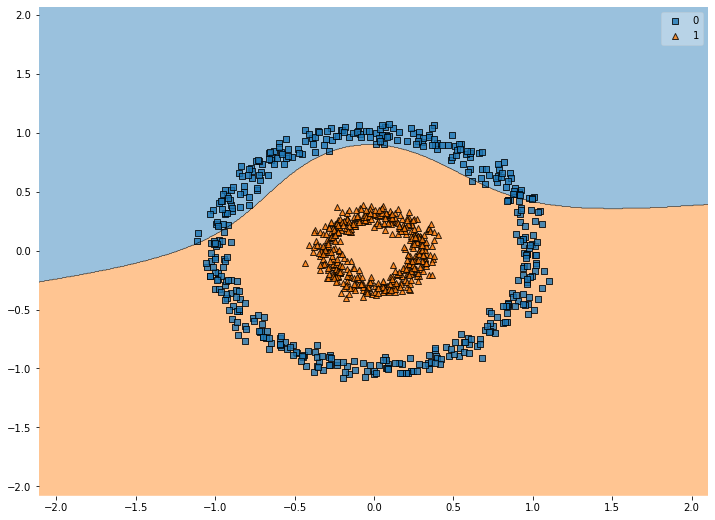

In [14]:
plt.figure(figsize=(12, 9))
plot_decision_regions(X_train, y_train, ScikitPolyModel) #plot decision regions


#Multi-class Classifeir Suport Vector Machine

In [15]:
#projection points for Multi SVM
def ProjectionModelPoints(Values, z=1):
    TotalFeatures = Values.shape[0] #features
    ValuesSorted = np.sort(Values)[::-1] #soritng the values 
    CUMSUMVALUE = np.cumsum(ValuesSorted) - z #calcaulting cumsum values 
    FeatureInd = np.arange(TotalFeatures) + 1 #features based on indexes 
    Conditions = ValuesSorted - CUMSUMVALUE / FeatureInd > 0 
    value_rho = FeatureInd[Conditions][-1] #Rho values constant
    theta = CUMSUMVALUE[Conditions][-1] / float(value_rho) # theta value
    FeatureWeights = np.maximum(Values - theta, 0) #Minimum feature weights 
    return FeatureWeights

In [16]:
class MultiClassSVMClassifier(BaseEstimator, ClassifierMixin): #Multi SVM classifier Model
    #intiating and initailising constructor 
    def __init__(self, C=1, max_iter=100, tol=0.05,random_state=None, verbose=0):
        self.C = C #constant
        self.random_state = random_state #random state 
        self.verbose = verbose #verbose values 
        self.max_iter = max_iter #total training iterations 
        self.tol = tol #Tolerance values 
        
    def _Gradient(self, X, y, i): #gradient values 
        # calaculating grdient vaues for ith values or index
        GradientValue = np.dot(X[i], self.coef_.T) + 1
        GradientValue[y[i]] -= 1
        return GradientValue

    def _Optimal_(self, GradientValue, y, i):
        # Total optimality for all the violations 
        SmallestValue = np.inf #smallest values 
        for k in range(GradientValue.shape[0]):
            if k == y[i] and self.dual_coef_[k, i] >= self.C:
                continue
            elif k != y[i] and self.dual_coef_[k, i] >= 0:
                continue
            SmallestValue = min(SmallestValue, GradientValue[k]) #mininum value s
        return GradientValue.max() - SmallestValue

    def SubProblem(self, GradientValue, y, Normalisation, i): #solving using sub problem method
        # proejction for multi vectors 
        WeightShape = np.zeros(GradientValue.shape[0]) #weight shapes 
        WeightShape[y[i]] = self.C
        BetaValue = Normalisation[i] * (WeightShape - self.dual_coef_[:, i]) + GradientValue / Normalisation[i]
        z = self.C * Normalisation[i] #z values after performing normalizations 

        # Simplex for multi class computing 
        beta = ProjectionModelPoints(BetaValue, z)
        return WeightShape - self.dual_coef_[:, i] - beta / Normalisation[i]

    def fit(self, X, y):
        FeatureValues, TotalFeatures = X.shape
        # Stadarizaton of dataset 
        self._label_encoder = LabelEncoder()
        y = self._label_encoder.fit_transform(y)
        #Calculating the Primal and Dual Coefficients
        TotalClasses = len(self._label_encoder.classes_) #total classes
        self.dual_coef_ = np.zeros((TotalClasses, FeatureValues), dtype=np.float64) #dual coefficent 
        self.coef_ = np.zeros((TotalClasses, TotalFeatures)) #coefficient

        # Computing Normalisation.
        Normalisation = np.sqrt(np.sum(X ** 2, axis=1))

        #Shuffling random using the indicies
        RandomValues = check_random_state(self.random_state)
        IndexValues = np.arange(FeatureValues) #index values 
        RandomValues.shuffle(IndexValues) #randomization of values 

        Measure_ = None #measurement 
        for it in range(self.max_iter):
            SumMeasure = 0
            for ii in range(FeatureValues):
                i = IndexValues[ii]
                # All-zero samples are ignored
                if Normalisation[i] == 0:
                    continue
                GradientValue = self._Gradient(X, y, i)
                val = self._Optimal_(GradientValue, y, i)
                SumMeasure += val
                if val < 1e-12:
                    continue
                # Solve problem for each ith values 
                ValueDelta = self.SubProblem(GradientValue, y, Normalisation, i)
                # Updating the Primal and Dual Coefficients.
                self.coef_ += (ValueDelta * X[i][:, np.newaxis]).T
                self.dual_coef_[:, i] += ValueDelta
            if it == 0:
                Measure_ = SumMeasure
            TotalMeasure = SumMeasure / Measure_
            if self.verbose >= 1:
                print("Total_No_Of_Iterations", it + 1, "Problems", TotalMeasure)
            if TotalMeasure < self.tol:
                if self.verbose >= 1:
                    print("Changed")
                break
        return self

    def predict(self, X):
        WeightValues = np.dot(X, self.coef_.T)
        Modelpred = WeightValues.argmax(axis=1)
        return self._label_encoder.inverse_transform(Modelpred)

In [17]:
iris = load_iris() #iris dataset 
Feature, Target = iris.data, iris.target #feature and target values for iris dataset 
MultSVmCLF = MultiClassSVMClassifier(C=0.1, tol=0.01, max_iter=100, random_state=0, verbose=1)
MultSVmCLF.fit(Feature, Target)

Total_No_Of_Iterations 1 Problems 1.0
Total_No_Of_Iterations 2 Problems 0.9275458043179818
Total_No_Of_Iterations 3 Problems 0.8160522950492526
Total_No_Of_Iterations 4 Problems 0.6990455291229618
Total_No_Of_Iterations 5 Problems 0.6393618992982688
Total_No_Of_Iterations 6 Problems 0.5957671717992999
Total_No_Of_Iterations 7 Problems 0.5362919287445385
Total_No_Of_Iterations 8 Problems 0.47177217115298603
Total_No_Of_Iterations 9 Problems 0.44812761767941456
Total_No_Of_Iterations 10 Problems 0.3834613038353731
Total_No_Of_Iterations 11 Problems 0.32486115892212175
Total_No_Of_Iterations 12 Problems 0.31971195362827926
Total_No_Of_Iterations 13 Problems 0.28406640322176
Total_No_Of_Iterations 14 Problems 0.25196678183156795
Total_No_Of_Iterations 15 Problems 0.236953733052649
Total_No_Of_Iterations 16 Problems 0.2157370636672199
Total_No_Of_Iterations 17 Problems 0.22122019071889124
Total_No_Of_Iterations 18 Problems 0.20305075101443315
Total_No_Of_Iterations 19 Problems 0.19670792263

MultiClassSVMClassifier(C=0.1, random_state=0, tol=0.01, verbose=1)

In [18]:
print(MultSVmCLF.score(Feature, Target)) #prediction on data 

0.9733333333333334


# OneVsRestClassifier and Linear SVC

In [19]:
#one vs rest classifier 
SupportVectorCLF = LinearSVC(random_state=42)
ONEVSRESTClassfier = OneVsRestClassifier(SupportVectorCLF)
Fit_model = ONEVSRESTClassfier.fit(Feature, Target) #prediction 
print(Fit_model.score(Feature, Target)) 

0.9666666666666667
